In [1]:
import pandas as pd
import numpy as np

In [2]:
# Loading the Data
data = pd.read_excel("D:/Data Analytics/Masters Capstone/MArketing/Dataset/data.xlsx")
country_code = pd.read_excel("D:/Data Analytics/Masters Capstone/MArketing/Dataset/Country-Code.xlsx")

In [3]:
print (data.head())
print ()
print (country_code.head())

   Restaurant ID              Restaurant Name  Country Code     City  \
0        7402935                         Skye            94  Jakarta   
1        7410290     Satoo - Hotel Shangri-La            94  Jakarta   
2        7420899                   Sushi Masa            94  Jakarta   
3        7421967               3 Wise Monkeys            94  Jakarta   
4        7422489  Avec Moi Restaurant and Bar            94  Jakarta   

                                             Address  \
0  Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...   
1               Hotel Shangri-La, Jl. Jend. Sudirman   
2                   Jl. Tuna Raya No. 5, Penjaringan   
3                Jl. Suryo No. 26, Senopati, Jakarta   
4  Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta   

                        Locality                        Locality Verbose  \
0  Grand Indonesia Mall, Thamrin  Grand Indonesia Mall, Thamrin, Jakarta   
1     Hotel Shangri-La, Sudirman     Hotel Shangri-La, Sudirman, Jakarta   
2 

In [4]:
# Understanding the data 
# Shape, Missing Values, Duplicaes and Data types

print (data.shape)
print (data.info())

(9551, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate 

In [5]:
print (data.isnull().sum())
print (data.dtypes)

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Price range               int64
Aggregate rat

In [6]:
print (data.duplicated().sum())

0


In [7]:
# Remove Duplicates
data.drop_duplicates(inplace=True)

In [8]:
# Restaurant Name         1
# Cuisines                9

missing_restaurant_name = data[data['Restaurant Name'].isna()]
missing_cuisines = data[data['Cuisines'].isna()]

In [9]:
data = data.dropna(subset=['Restaurant Name'])
data['Cuisines'].fillna("Unknown", inplace=True)

C:\Users\ishwa\AppData\Local\Temp\ipykernel_11724\1018201617.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cuisines'].fillna("Unknown", inplace=True)


In [10]:
print (data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [11]:
print (data.head())
print (country_code.head())

   Restaurant ID              Restaurant Name  Country Code     City  \
0        7402935                         Skye            94  Jakarta   
1        7410290     Satoo - Hotel Shangri-La            94  Jakarta   
2        7420899                   Sushi Masa            94  Jakarta   
3        7421967               3 Wise Monkeys            94  Jakarta   
4        7422489  Avec Moi Restaurant and Bar            94  Jakarta   

                                             Address  \
0  Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...   
1               Hotel Shangri-La, Jl. Jend. Sudirman   
2                   Jl. Tuna Raya No. 5, Penjaringan   
3                Jl. Suryo No. 26, Senopati, Jakarta   
4  Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta   

                        Locality                        Locality Verbose  \
0  Grand Indonesia Mall, Thamrin  Grand Indonesia Mall, Thamrin, Jakarta   
1     Hotel Shangri-La, Sudirman     Hotel Shangri-La, Sudirman, Jakarta   
2 

In [12]:
df = pd.merge(data, country_code, on= 'Country Code', how = 'left')

In [13]:
df.to_excel("D:/Data Analytics/Masters Capstone/MArketing/Dataset/cleaned_data.xlsx", index=False)
print("Excel file saved successfully!")

Excel file saved successfully!


In [14]:
# Geographical Distribution of Restaurants

city_count = df['City'].value_counts()

print (f'Maximum number of restaurants in', city_count.head())
print ()
print (f'Minimum number of restaurants in', city_count.tail())

Maximum number of restaurants in City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

Minimum number of restaurants in City
Lincoln    1
Monroe     1
Potrero    1
Weirton    1
Miller     1
Name: count, dtype: int64


In [15]:
# Most national presence franchise

franchise = df['Restaurant Name'].value_counts().head(20)
print (f'Franchise with most national presence', franchise)

Franchise with most national presence Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
Keventers             34
Pizza Hut             30
Giani                 29
Baskin Robbins        28
Barbeque Nation       26
Dunkin' Donuts        22
Barista               22
Giani's               22
Costa Coffee          20
Pind Balluchi         20
Sagar Ratna           19
Twenty Four Seven     19
Wah Ji Wah            19
Pizza Hut Delivery    19
Chaayos               18
Name: count, dtype: int64


In [16]:
# ratio between table booking vs not allowing Table booking
tbl_book = df["Has Table booking"].value_counts()
print (tbl_book)

Has Table booking
No     8392
Yes    1158
Name: count, dtype: int64


In [17]:
tbl_book_ratio = round (tbl_book['Yes']/tbl_book['No'], 3)
print (f' The ratio between Restaurants that allows Table booking vs that do not allow is {tbl_book_ratio}:1')

 The ratio between Restaurants that allows Table booking vs that do not allow is 0.138:1


In [18]:
# Percentage of Restauraunt providing Online Delivery
online_del = df['Has Online delivery'].value_counts()
print (online_del)

Has Online delivery
No     7099
Yes    2451
Name: count, dtype: int64


In [19]:
percent_online_del = round((online_del['Yes']/df.shape[0])*100, 2)
print (f'Percentage of restaurant providing online delivery is {percent_online_del}%')

Percentage of restaurant providing online delivery is 25.66%


In [20]:
# The difference in no. of votes fro the restaurant that delivers and that do not deliver

# Votes based on delivery  
votes_delivery = df[df['Has Online delivery'] == 'Yes']['Votes']
no_votes_delivery = df[df['Has Online delivery'] == 'No']['Votes']

# Avg votes based on delivery 
avg_votes_delivery = votes_delivery.mean()
avg_no_votes_delivery = no_votes_delivery.mean()

# Difference between the votes for the restaurant that delivers and that do not deliver
vote_difference = avg_votes_delivery - avg_no_votes_delivery

print(f"Average votes for restaurants with delivery: {avg_votes_delivery:.2f}")
print(f"Average votes for restaurants without delivery: {avg_no_votes_delivery:.2f}")
print (f'The differnce between the votes for the restaurant that delivers and that do not deliver is {vote_difference: .2f}')

Average votes for restaurants with delivery: 211.31
Average votes for restaurants without delivery: 138.04
The differnce between the votes for the restaurant that delivers and that do not deliver is  73.26


In [21]:
# Top 10 cuisines served across the city 

top_10_cuisine = df['Cuisines'].str.split(', ').explode().value_counts().head(10)
print (f'The top 10 cuisines served across cities are {top_10_cuisine}')

The top 10 cuisines served across cities are Cuisines
North Indian    3959
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          763
Bakery           745
Continental      735
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


In [22]:
# Maximum and Minimum number of cuisines that a restaurant serves
cuisine_count = df['Cuisines'].apply(lambda x: len(x.split(', ')))

In [24]:
max_count = cuisine_count.max()
min_count = cuisine_count.min()

print (f'Maximum number of cuisines served are {max_count}')
print (f'Minimum number of cuisines served are {min_count}')

Maximum number of cuisines served are 8
Minimum number of cuisines served are 1


In [27]:
# Also which is the most served cuisine across teh restaurnat fro Each city?

data_exploded = data.assign(Cuisine=data["Cuisines"].str.split(", ")).explode("Cuisine")
cuisine_counts = data_exploded.groupby(["City", "Cuisine"]).size().reset_index(name="Count")
most_served_cuisine_per_city = cuisine_counts.loc[cuisine_counts.groupby("City")["Count"].idxmax()]
print(most_served_cuisine_per_city)

                 City       Cuisine  Count
11          Abu Dhabi        Indian      7
37               Agra  North Indian     15
48          Ahmedabad   Continental     11
62             Albany      American      4
92          Allahabad  North Indian     12
...               ...           ...    ...
1822          Weirton        Burger      1
1827  Wellington City          Cafe      9
1842   Winchester Bay        Burger      1
1845          Yorkton         Asian      1
1849        €¡stanbul          Cafe      4

[141 rows x 3 columns]


In [29]:
# Summary -- Distribution cost across the restaurant 

print (f'Mean: {round(df['Average Cost for two'].mean(), 2)}')
print (f'Median: {round(df['Average Cost for two'].median(), 2)}')
print (f'STD: {round(df['Average Cost for two'].std(), 2)}')
print (f'MInimum: {round(df['Average Cost for two'].min(), 2)}')
print (f'Maximum: {round(df['Average Cost for two'].max(), 2)}')

Mean: 1199.25
Median: 400.0
STD: 16122.03
MInimum: 0
Maximum: 800000


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

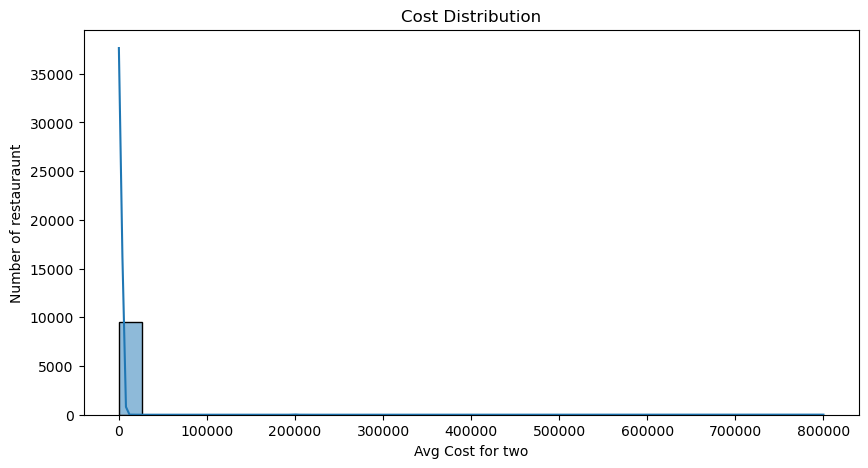

In [31]:
# Distribution cost across the restaurant 

plt.figure(figsize=(10, 5))
sns.histplot(df['Average Cost for two'], bins= 30, kde=True)
plt.xlabel('Avg Cost for two')
plt.ylabel('Number of restauraunt')
plt.title('Cost Distribution')
plt.show()

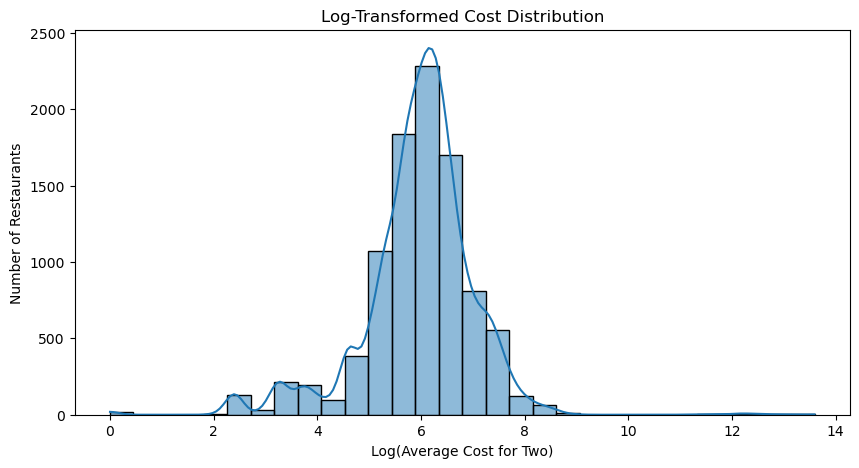

In [41]:
data["Log Cost"] = np.log1p(data["Average Cost for two"])

plt.figure(figsize=(10, 5))
sns.histplot(data["Log Cost"], bins=30, kde=True)
plt.xlabel("Log(Average Cost for Two)")
plt.ylabel("Number of Restaurants")
plt.title("Log-Transformed Cost Distribution")
plt.show()

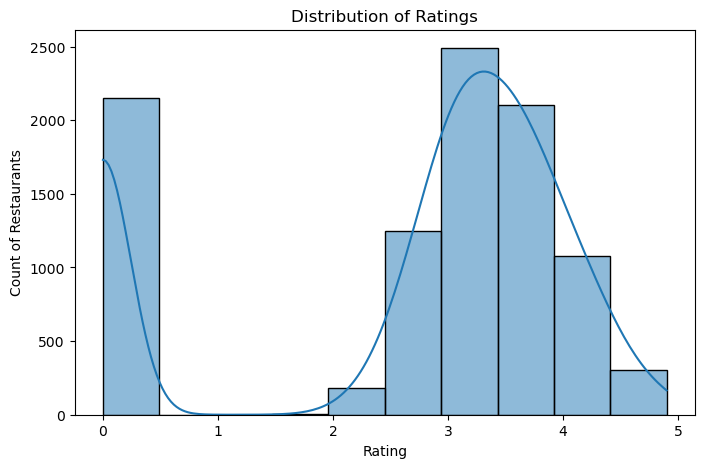

In [34]:
# Distribution of Ratings across Restaurants

plt.figure(figsize=(8, 5))
sns.histplot(df["Aggregate rating"], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count of Restaurants")
plt.show()

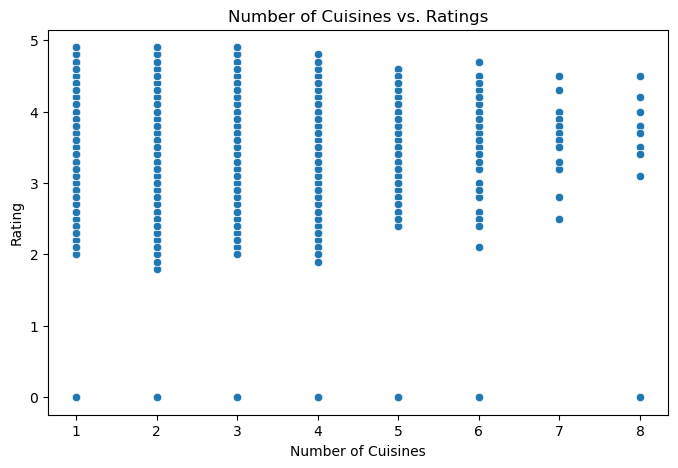

In [42]:
# rating vs Cuisines

df["Num_Cuisines"] = df["Cuisines"].str.split(", ").apply(len)  # Count cuisines per restaurant

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Num_Cuisines"], y=df["Aggregate rating"])
plt.title("Number of Cuisines vs. Ratings")
plt.xlabel("Number of Cuisines")
plt.ylabel("Rating")
plt.show()

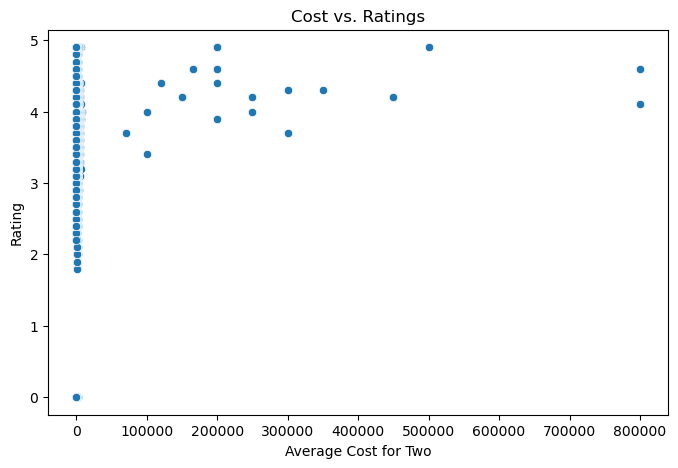

In [35]:
# Rating ~ Cost

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Average Cost for two"], y=df["Aggregate rating"])
plt.title("Cost vs. Ratings")
plt.xlabel("Average Cost for Two")
plt.ylabel("Rating")
plt.show()

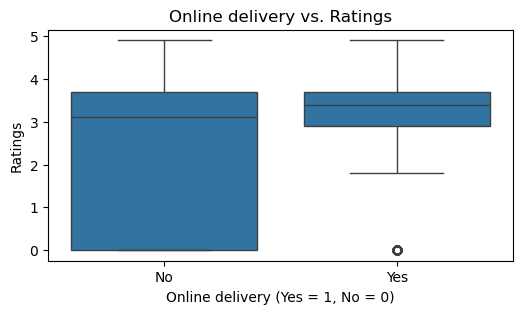

In [38]:
# Online Delivery ~ Ratings

plt.figure(figsize=(6, 3))
sns.boxplot(x = df['Has Online delivery'], y = df['Aggregate rating'])
plt.title('Online delivery vs. Ratings')
plt.xlabel('Online delivery (Yes = 1, No = 0)')
plt.ylabel('Ratings')
plt.show()

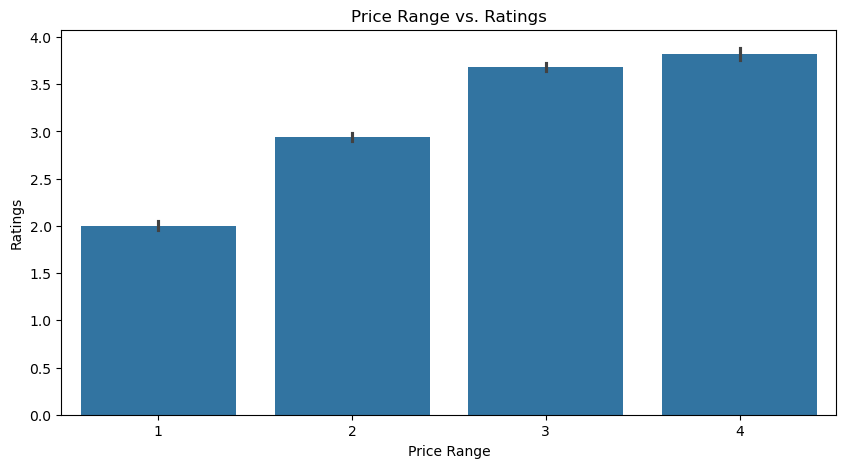

In [48]:
# Price range 

plt.figure(figsize=(10, 5))
sns.barplot(x = df['Price range'], y = df['Aggregate rating'])
plt.title('Price Range vs. Ratings')
plt.xlabel('Price Range')
plt.ylabel('Ratings')
plt.show()

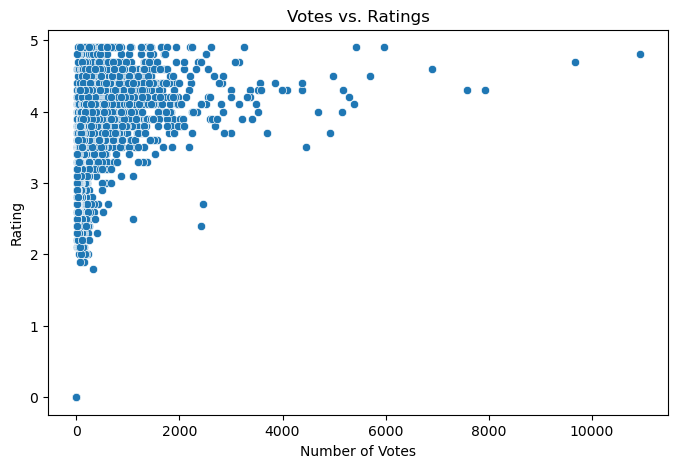

In [56]:
# NUmber of Votes

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Votes"], y=df["Aggregate rating"])
plt.title("Votes vs. Ratings")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.show()

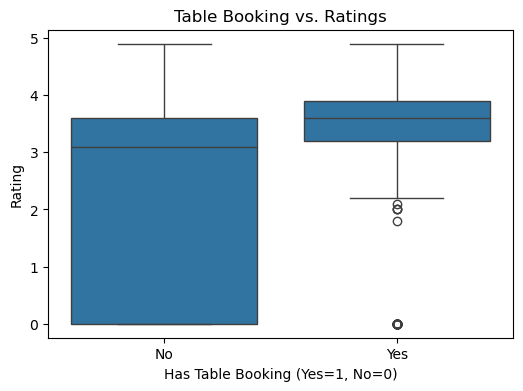

In [57]:
# Table booking options

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Has Table booking"], y=df["Aggregate rating"])
plt.title("Table Booking vs. Ratings")
plt.xlabel("Has Table Booking (Yes=1, No=0)")
plt.ylabel("Rating")
plt.show()

### Factors in data that may effect on ratings. 

1. **Distribution of rating**
    - High number of unrated restaurants (Rating = 0) might need more customer reviews.
3. **Cuisines vs Rating**
    - Restaurants offer between 1 to 8 cuisines.
    - There is no clear increasing or decreasing trend, meaning the number of cuisines does not strongly impact ratings.
4.  **Cost vs Ratings**
    -  Higher-cost restaurants generally have higher ratings, suggesting better quality and service.
    -  Most restaurants are low-cost, but their ratings vary, meaning cost alone doesn't determine customer satisfaction.
    -  Many low-cost restaurants have ratings of 0, possibly due to fewer reviews or low engagement.
5.  **Online Delivery vs Ratings**
    - The median rating (bold line inside the box) is slightly higher for restaurants that offer online delivery.
    - This suggests that online delivery may have a small positive effect on ratings.
6.  **Votes vs Ratings**
    - The majority of data points are concentrated on the left, indicating that most restaurants have a low number of votes.
    - A few outliers exist, where some restaurants have high votes but relatively lower ratings.
7.  **Table booking vs Ratings**
    - Restaurants that allow table booking (Yes = 1) have a higher median rating (~3.8-4.0) compared to those that do not (~3.2).